In [3]:
import numpy as np


In [10]:
class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    distinct_rows = N

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R


In [3]:
N = 2000
M = 3*N
Tmax = 500
b = np.linspace(0.0002, 2, 20)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

times, R = find_tranformation_matrix(10, E, N, Tmax)

p_mixing_times = []
mixing_times = []

for i in range(len(b)):
    t_mixing = 0
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax)
        p_mix_index = np.min(np.where(R==1)[0])
        t_mixing += times[-1]
        t_p_mixing += times[p_mix_index]
    mixing_times.append(t_mixing/10)
    p_mixing_times.append(t_p_mixing/10)
    print(t_mixing/10)
    print(t_p_mixing/10)


print(mixing_times)
print(p_mixing_times)


8.015025055771702
7.376527300649931
15.625748798788697
13.261817400503338
499.9995291115091
62.4790093448579
499.9997972366418
26.15837775119352
499.99981337161745
16.37731681928351
499.99985198495494
12.709709800279024
499.9998863925308
10.943629585777776
499.99977267847544
8.838015213069667
499.9998221542307
8.208430691961455
499.99991602103785
7.031123935155077
499.99989626254035
6.237979641704129
499.9999283184543
6.178068207776971
499.99989692426004
5.905843597137272
499.999957073308
5.535531015832623
499.9999030043562
4.893914516830284
499.9998829149187
4.975048056185172
499.9999222057315
4.9348665686962665
499.9998819120186
4.290912174198864
499.99992754401364
3.9975874355002885
499.9999341113136
4.3009818607920405
[8.015025055771702, 15.625748798788697, 499.9995291115091, 499.9997972366418, 499.99981337161745, 499.99985198495494, 499.9998863925308, 499.99977267847544, 499.9998221542307, 499.99991602103785, 499.99989626254035, 499.9999283184543, 499.99989692426004, 499.999957073

In [6]:
mixing_times = [8.015025055771702, 15.625748798788697, 499.9995291115091, 499.9997972366418, 499.99981337161745, 499.99985198495494, 499.9998863925308, 499.99977267847544, 499.9998221542307, 499.99991602103785, 499.99989626254035, 499.9999283184543, 499.99989692426004, 499.999957073308, 499.9999030043562, 499.9998829149187, 499.9999222057315, 499.9998819120186, 499.99992754401364, 499.9999341113136]
p_mixing_times = [7.376527300649931, 13.261817400503338, 62.4790093448579, 26.15837775119352, 16.37731681928351, 12.709709800279024, 10.943629585777776, 8.838015213069667, 8.208430691961455, 7.031123935155077, 6.237979641704129, 6.178068207776971, 5.905843597137272, 5.535531015832623, 4.893914516830284, 4.975048056185172, 4.9348665686962665, 4.290912174198864, 3.9975874355002885, 4.3009818607920405]
b = np.linspace(0.0002, 2, 20)


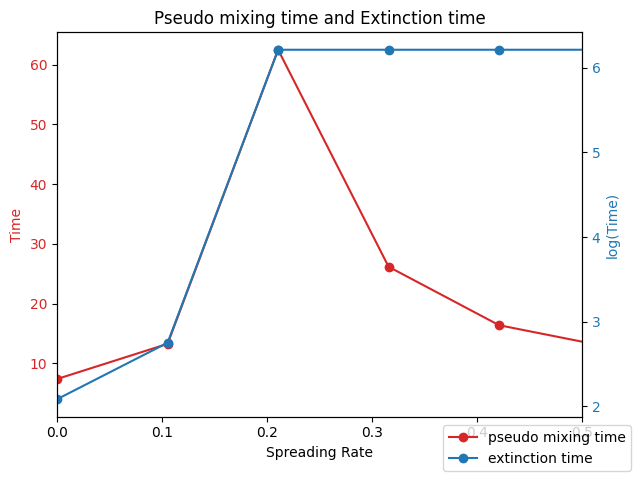

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, p_mixing_times, color=color, marker = 'o', label= 'pseudo mixing time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 0.5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('log(Time)', color=color)  # we already handled the x-label with ax1
ax2.plot(b, np.log(mixing_times), color=color, marker = 'o', label = 'extinction time')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc = 'lower right')
plt.title('Pseudo mixing time and Extinction time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [13]:
import numpy as np
b = np.linspace(0.0001, 0.5, 20)
import networkx as nx
N = 2000
## choose network from network X and change M0 and G
M0 = 30
Tmax = 500

G = nx.barabasi_albert_graph(N, M0)

## return edge matrix (required for the simulation)
E_barabasi = list(G.edges)

p_mixing_times = []
mixing_times = []

for i in range(len(b)):
    t_mixing = 0
    t_p_mixing = 0
    times, R = find_tranformation_matrix(b[i], E_barabasi, N, Tmax)
    if np.round(times[-1]) == Tmax:
        print('no extinction') 
        mixing_times.append(Tmax)
        for j in range(10):
            times, R = find_tranformation_matrix(b[i], E_barabasi, N, Tmax, 1)
            p_mix_index = np.min(np.where(R==1)[0])
            t_p_mixing += times[p_mix_index]
    else:
        print('system does go extinct')
        for j in range(10):
            times, R = find_tranformation_matrix(b[i], E_barabasi, N, Tmax)
            p_mix_index = np.min(np.where(R==1)[0])
            t_mixing += times[-1]
            t_p_mixing += times[p_mix_index]
        mixing_times.append(t_mixing/10)
    p_mixing_times.append(t_p_mixing/10)
    print(t_mixing/10)
    print(t_p_mixing/10)


print(mixing_times)
print(p_mixing_times)


system does go extinct
8.369817479625292
7.567738845107729
no extinction
0.0
19.211363993960497
no extinction
0.0
10.300602076486625
no extinction
0.0
6.535096041451017
no extinction
0.0
4.998401703385136
no extinction
0.0
4.0219624212398175
no extinction
0.0
3.516639883694006
no extinction
0.0
2.8620036377000164
no extinction
0.0
2.5410983995309055
no extinction
0.0
2.2469599325940948
no extinction
0.0
1.9508667445566394
no extinction
0.0
1.9477221510832865
no extinction
0.0
1.7182764852284762
no extinction
0.0
1.6694366297230814
no extinction
0.0
1.503216818721509
no extinction
0.0
1.4046526533472214
no extinction
0.0
1.3539513635627884
no extinction
0.0
1.2472023048776981
no extinction
0.0
1.2223224376128605
no extinction
0.0
1.1245332324459898
[8.369817479625292, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]
[7.567738845107729, 19.211363993960497, 10.300602076486625, 6.535096041451017, 4.998401703385136, 4.0219624212398175, 3.5166398

In [15]:
mixing_time_bar = [8.369817479625292, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]
p_mixing_time_bar = [7.567738845107729, 19.211363993960497, 10.300602076486625, 6.535096041451017, 4.998401703385136, 4.0219624212398175, 3.516639883694006, 2.8620036377000164, 2.5410983995309055, 2.2469599325940948, 1.9508667445566394, 1.9477221510832865, 1.7182764852284762, 1.6694366297230814, 1.503216818721509, 1.4046526533472214, 1.3539513635627884, 1.2472023048776981, 1.2223224376128605, 1.1245332324459898]
b_bar = np.linspace(0.0001, 0.5, 20)


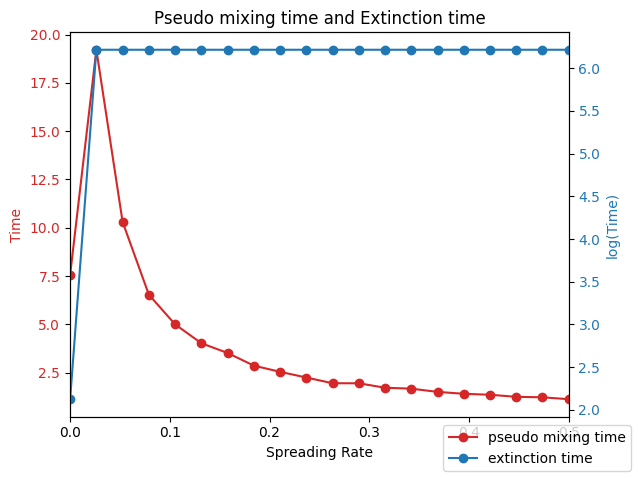

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b_bar, p_mixing_time_bar, color=color, marker = 'o', label= 'pseudo mixing time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 0.5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('log(Time)', color=color)  # we already handled the x-label with ax1
ax2.plot(b_bar, np.log(mixing_time_bar), color=color, marker = 'o', label = 'extinction time')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc = 'lower right')
plt.title('Pseudo mixing time and Extinction time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
